In [1]:
import os
import sys

XMem_path = os.path.abspath('../')
sys.path.append(XMem_path)

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch

from inference.data.mask_mapper import MaskMapper
from inference.data.video_reader import VideoReader

In [3]:
data_path = Path('/Users/syedal/plaksha/SurgicalAI/data/endovis/endo17/data')

frames_path = data_path / 'frames/test/instrument_dataset_01'
masks_path = data_path / 'masks/test/type_masks/instrument_dataset_01'
vid_reader = VideoReader(frames_path, frames_path, masks_path, size=384, use_all_mask=True)

In [4]:
mapper = MaskMapper()

In [5]:
vid_reader[0]['info']

{'frame': 'frame225.png',
 'save': True,
 'idx': 0,
 'shape': (1024, 1280),
 'need_resize': True}

In [13]:
idx = 0
rgb, mask = vid_reader[idx]['rgb'], vid_reader[idx]['mask']
print(rgb.shape, mask.shape)

torch.Size([3, 384, 480]) (1024, 1280)


Unique values in mask: [0 1 2]


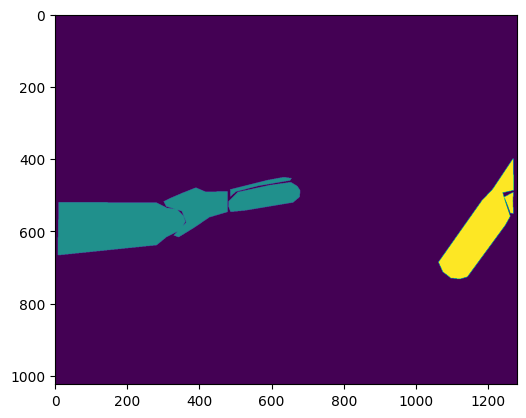

In [14]:
print("Unique values in mask:", np.unique(mask))
plt.imshow(mask);plt.show()


In [8]:
mask, labels = mapper.convert_mask(mask)
print("Labels:", labels)

Labels: [1, 2]


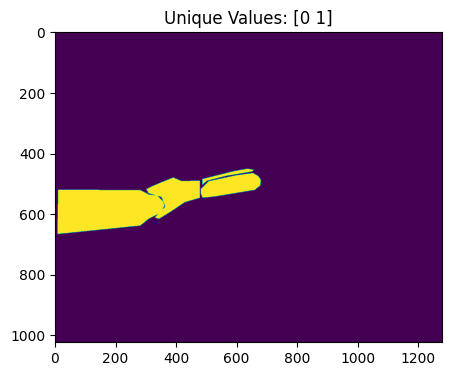

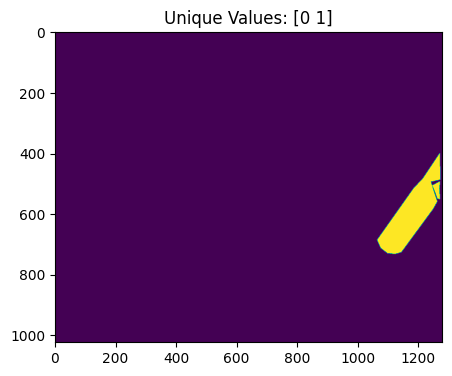

In [9]:
for m in mask:
    unique_values = np.unique(m)
    plt.figure(figsize=(5, 5))
    plt.imshow(m.numpy())
    plt.title(f"Unique Values: {unique_values}")
    plt.show()
